In [1]:
import os
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pandas.io.formats.style
from sklearn.preprocessing import StandardScaler

### Loading and Cleaning DataFrame

In [2]:
df=pd.read_csv('exp_results/GROUP4-FINAL exp2a-table.csv',skiprows=6).rename(columns={})
df=df.copy().rename(columns={ 'japanese-resupply-rate':'j-resupp',
                             'japanese_supplies':'j-supp', 
                             'britain-casualties-hunger':'b-hung',
                             'britain-casualties-combat':'b-comb',
                             'japan-casualties-hunger':'j-hung',
                             'japan-casualties-combat':'j-comb', 
                             'control-imphal':'imp',
                             'control-kohima':'koh'})
df1=df[['ticks','j-supp','b-hung','b-comb','j-hung','j-comb', 'imp', 'koh']].copy()

In [3]:
df1=df[['ticks','j-supp','b-hung','b-comb','j-hung','j-comb', 'imp', 'koh']].copy()
df1.loc[df1['imp']=='Britain','imp']=0.0
df1.loc[df1['imp']=='Japan','imp']=1.0
df1.loc[df1['koh']=='Britain','koh']=0.0
df1.loc[df1['koh']=='Japan','koh']=1.0
df1['koh']=df1['koh'].astype(int)
df1['imp']=df1['imp'].astype(int)
df1['j-tot']=df1['j-comb']+df1['j-hung']
df1['b-tot']=df1['b-comb']+df1['b-hung']
df1['j-per']=df1['j-comb']/df1['j-tot']
df1['b-per']=df1['b-comb']/df1['b-tot']

### Summary Stats and Regression Analysis (for tables)

In [4]:
#Summary stats
exp2a=df1.groupby('j-supp',as_index=False).agg({'j-tot' : 'mean', 
                                               'b-tot' : 'mean',
                                               'imp':'sum',
                                               'koh':'sum',
                                               'ticks':'mean',
                                               'j-per':'mean',
                                               'b-per':'mean'})
a=exp2a.rename(columns={'j-supp':'Initial supplies', 
                      'j-tot':'Axis Casualties', 
                      'b-tot':'Ally Casualties', 
                      'imp':'Imphal Captured', 
                      'koh':'Kohima Captured', 
                      'ticks':'Days', 
                      'j-per':'% Combat'})

In [5]:
b=a[['Initial supplies', 'Axis Casualties', 'Ally Casualties',
       'Imphal Captured', 'Kohima Captured', 'Days', '% Combat']]
b['% Combat']=b['% Combat']*100
b.round().astype(int)

C:\Users\jwats\AppData\Local\Temp\ipykernel_28560\1830461231.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['% Combat']=b['% Combat']*100


,Initial supplies,Axis Casualties,Ally Casualties,Imphal Captured,Kohima Captured,Days,% Combat
0,0,31274,3214,0,0,51,4
1,10,38914,9132,0,0,75,10
2,25,52400,21067,0,0,104,38
3,50,64269,43285,0,0,136,67
4,75,73408,62317,0,0,167,85
5,100,78653,77504,0,0,203,93


In [6]:
### Regression 1: casualties vs supplies
import statsmodels.api as sm

#define response variable
y = df1['j-tot']

#define predictor variables
x = df1[['j-supp']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
#print(model.summary())
print(model.params[1])
print(model.bse[1])
print(model.fvalue)
print(model.pvalues[1])
print(model.rsquared)


474.33372307692287
5.658444262895175
7027.064174672466
0.0
0.921574430548883


In [7]:
### Regression 2: days vs supplies
import statsmodels.api as sm

#define response variable
y = df1['ticks']

#define predictor variables
x = df1[['j-supp']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.params[1])
print(model.bse[1])
print(model.fvalue)
print(model.pvalues[1])
print(model.rsquared)


1.4599999999999997
0.013967406655319762
10926.32605608691
0.0
0.9481097638951175


In [8]:
### Regression 3: days vs casualties
import statsmodels.api as sm

#define response variable
y = df1['j-tot']

#define predictor variables
x = df1[['ticks']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.params[1])
print(model.bse[1])
print(model.fvalue)
print(model.pvalues[1])
print(model.rsquared)

322.59608854783926
2.7498644652197446
13762.445644801079
0.0
0.9583578382738773


In [9]:
### Regression 4: capturing imphal vs supplies
import statsmodels.api as sm

#define response variable
y = df1['imp']

#define predictor variables
x = df1['j-supp']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
#fit linear regression model
#model = sm.Logit(y, x).fit()

#view model summary
#print(model.summary())
#print(model.summary2())

In [10]:
### Regression 5: capturing imphal vs supplies
import statsmodels.api as sm

#define response variable
y = df1['koh']

#define predictor variables
x = df1['j-supp']

#add constant to predictor variables
#x = sm.add_constant(x)

#fit linear regression model
#model = sm.Logit(y, x).fit()

#view model summary
#print(model.summary())
#print(model.summary2())

### Data Visualizations: Scatter plots

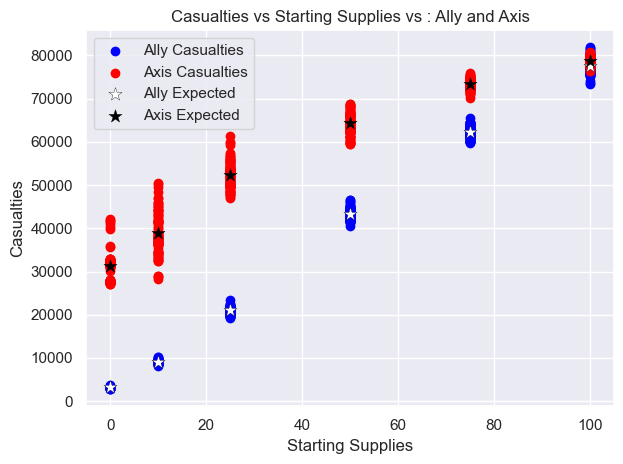

In [11]:
sns.set_theme()

plt.scatter(df1['j-supp'], df1['b-tot'],color='blue',label='Ally Casualties', zorder=1)
plt.scatter(df1['j-supp'], df1['j-tot'], color='red',label='Axis Casualties',zorder=1)
plt.scatter(exp2a['j-supp'], exp2a['b-tot'],color='white',marker='*',edgecolor='black',linewidth=0.25,label='Ally Expected',zorder=2,s=100)
plt.scatter(exp2a['j-supp'], exp2a['j-tot'], color='black',marker='*',edgecolor='black',linewidth=0.25,label='Axis Expected',zorder=2,s=100)

plt.title('Casualties vs Starting Supplies vs : Ally and Axis')
plt.xlabel('Starting Supplies')
plt.ylabel('Casualties')
plt.legend()
plt.tight_layout()
plt.savefig('images/exp2a1.png',dpi=500)
plt.show()


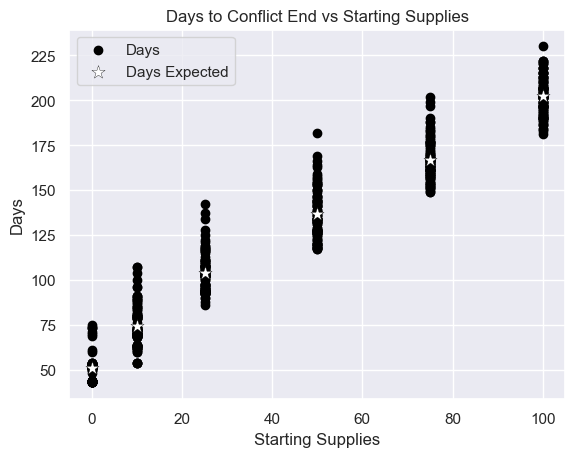

In [12]:
sns.set_theme()

plt.scatter(df1['j-supp'], df1['ticks'],label='Days', color="black")
plt.scatter(exp2a['j-supp'], exp2a['ticks'],label='Days Expected',color='white',marker='*',edgecolor='black',linewidth=0.25,zorder=2,s=100)
plt.title('Days to Conflict End vs Starting Supplies')

plt.xlabel('Starting Supplies')
plt.ylabel('Days')
plt.legend()
plt.savefig('images/exp2a2.png',dpi=500)
plt.show()